# ChromaDB Multimodal Querying
Code ref: https://github.com/johnnycode8/chromadb_quickstart/blob/main/chroma_multimodal.ipynb

In [3]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
from matplotlib import pyplot as plt

In [25]:
# Create database file at folder "vector_db" or load into client if exists.
chroma_client = chromadb.PersistentClient(path="vector_db")

# Instantiate image loader helper.
image_loader = ImageLoader()

# Instantiate multimodal embedding function.
multimodal_ef = OpenCLIPEmbeddingFunction()

# Delete existing collections
current_collections = chroma_client.list_collections()
for collections in current_collections:
    chroma_client.delete_collection(name=collections)

# Create the collection, aka vector database. Or, if database already exist, then use it. Specify the model that we want to use to do the embedding.
multimodal_db = chroma_client.get_or_create_collection(name="multimodal_db", embedding_function=multimodal_ef, data_loader=image_loader)

In [5]:
# Images to store in vector db
images = ['../data/images/Step1校內徵選.jpg', '../data/images/Step2校外徵選.jpg', '../data/images/Step3出國前後應繳交資料.jpg']

multimodal_db.add(
    ids=[str(index) for index in range(len(images))], 
    uris=images,
    metadatas=[{'img_category':'images'} for i in range(len(images))]
)

In [28]:
# Check record count
multimodal_db.count()

3

In [7]:
# Simple function to print the results of a query.
# The 'results' is a dict {ids, distances, data, ...}
# Each item in the dict is a 2d list.
def print_query_results(query_list: list, query_results: dict)->None:
    result_count = len(query_results['ids'][0])

    for i in range(len(query_list)):
        print(f'Results for query: {query_list[i]}')

        for j in range(result_count):
            id       = query_results["ids"][i][j]
            distance = query_results['distances'][i][j]
            data     = query_results['data'][i][j]
            document = query_results['documents'][i][j]
            metadata = query_results['metadatas'][i][j]
            uri      = query_results['uris'][i][j]

            print(f'id: {id}, distance: {distance}, metadata: {metadata}, document: {document}') 

            # Display image, the physical file must exist at URI.
            # (ImageLoader loads the image from file)
            print(f'data: {uri}')
            plt.imshow(data)
            plt.axis("off")
            plt.show()

Results for query: 深色框框的四個步驟
id: 2, distance: 1.3974696126485533, metadata: {'img_category': 'images'}, document: None
data: ../data/images/Step3出國前後應繳交資料.jpg


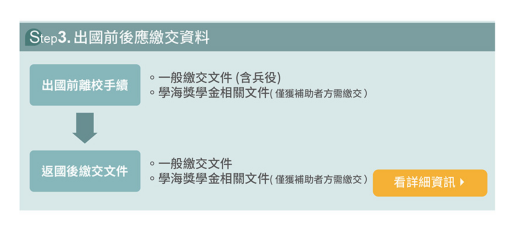

id: 0, distance: 1.4279729077315717, metadata: {'img_category': 'images'}, document: None
data: ../data/images/Step1校內徵選.jpg


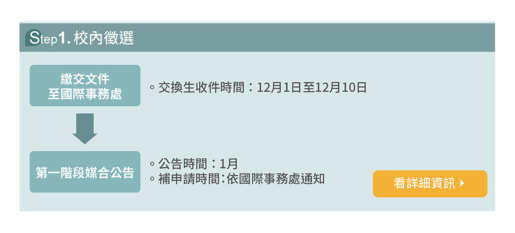

id: 1, distance: 1.4431701230193028, metadata: {'img_category': 'images'}, document: None
data: ../data/images/Step2校外徵選.jpg


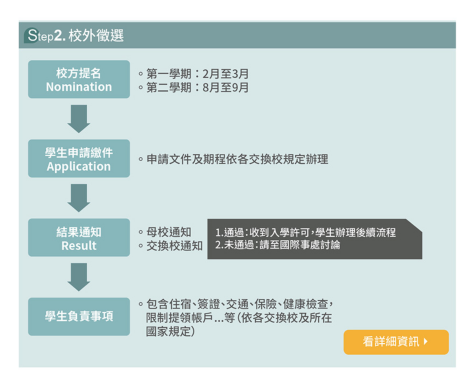

In [30]:
# query_texts = ["申請交換需要哪些文件"]
# query_texts = ["兵役文件"]
# query_texts = ["第一學期"]
query_texts = ["深色框框的四個步驟"]


query_results = multimodal_db.query(
    query_texts = query_texts,
    n_results=5,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
    where={'img_category':'images'}
)

print_query_results(query_texts, query_results)